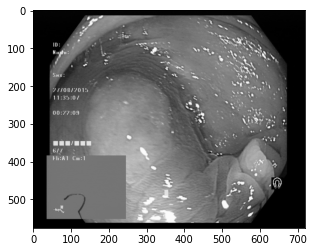

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
 
DATADIR = "/content/drive/MyDrive/kvasir-dataset"
CATEGORIES = ["dyed-lifted-polyps","esophagitis","dyed-resection-margins","normal-cecum","normal-pylorus","normal-z-line", "polyps","ulcerative-colitis"]
 
for category in CATEGORIES:
    path= os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break    
    break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(img_array.shape)

(576, 720)


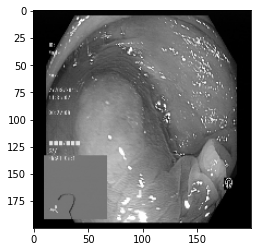

In [ ]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= "gray")
plt.show()

In [ ]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()            

In [ ]:
print(len(training_data))

30


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1]) 

0
0
0
1
2
0
0
0
0
2


In [ ]:
X=[]
y=[]

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X= np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)    

In [ ]:
import pickle

pickle_out= open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle, numpy
import time

#NAME="Ulcers-cnn-{}".format(int(time.time()))


X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]
y = np.array(y)

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Ulcers-cnn_new-{}-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add( Conv2D(layer_size, (3,3), input_shape = X.shape[1:]) )
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for l in range(conv_layer-1):
                model.add( Conv2D(layer_size, (3,3) ) )
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))
                model.add(Dropout(0.2))

            model.add(Dense(8))
            model.add(Activation('softmax'))
            
            tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


            #OR CATEGORICAL
            model.compile(loss="sparse_categorical_crossentropy",
                          optimizer="adam",
                          metrics=['accuracy'])

            model.fit(X,y, batch_size=32,epochs=10, validation_split=0.3, callbacks=[tensorboard])
            
            
model.save("ulcer-CNN.model")            


Ulcers-cnn_new-3-64
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.0838 - accuracy: 0.0476 - val_loss: 1.4545 - val_accuracy: 0.2222
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 1.3873 - accuracy: 0.4286 - val_loss: 1.1320 - val_accuracy: 0.2222
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 1.0408 - accuracy: 0.4762 - val_loss: 1.0194 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.9326 - accuracy: 0.5238 - val_loss: 0.8903 - val_accuracy: 0.5556
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.8409 - accuracy: 0.8095 - val_loss: 0.9430 - val_accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.7331 - accuracy: 0.7619 - val_loss: 0.7581 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.6943 - accuracy: 0.6190 - val_loss: 0.9115 - val_accuracy: 0.5556
Epoch 8/10
1/1 [=====

(576, 720)


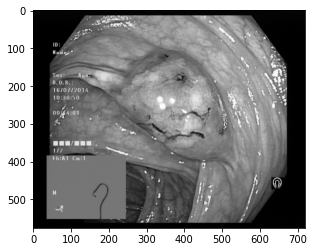

[[1. 0. 0. 0. 0. 0. 0. 0.]]
esophagitis


In [ ]:
import cv2
import tensorflow as tf 

CATEGORIES = ["dyed-lifted-polyps","esophagitis","dyed-resection-margins","normal-cecum","normal-pylorus","normal-z-line", "polyps","ulcerative-colitis"]

#DATADIR = "/content/drive/MyDrive/kvasir-dataset/"
#CATEGORIES = ["esophagitis", "polyps"]

def prepare(filepath):
    IMG_SIZE = 200
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    print(img_array.shape)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    return new_array.reshape(-1,200,200,1)
    
model = tf.keras.models.load_model("ulcer-CNN.model")    

prediction = model.predict([prepare('/content/drive/MyDrive/kvasir-dataset/dyed-resection-margins/0a11e5ca-8a31-48de-ada7-4ea02192377d.jpg')])
#img1= ('/content/drive/MyDrive/kvasir-dataset/dyed-resection-margins/0a11e5ca-8a31-48de-ada7-4ea02192377d.jpg')

print(prediction)
print(CATEGORIES[int(prediction[0][0])])